# Análisis predictivo de series temporales

-----

## Modelos autorregresivos y autocorrelación parcial

In [7]:
install.packages("devtools")     # only need to do this once
devtools::install_github("nickpoison/astsa")
install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas


Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependencies 'digest', 'jsonlite'



package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\jpmunoz\Documents\R\win-library\3.6\00LOCK\digest\libs\x64\digest.dll  a C:\Users\jpmunoz\Documents\R\win-library\3.6\digest\libs\x64\digest.dll: Permission denied"Warning message:
"restored 'digest'"

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\jpmunoz\Documents\R\win-library\3.6\00LOCK\jsonlite\libs\x64\jsonlite.dll  a C:\Users\jpmunoz\Documents\R\win-library\3.6\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jpmunoz\AppData\Local\Temp\RtmpIDY8KJ\downloaded_packages



Please download and install Rtools custom from https://cran.r-project.org/bin/windows/Rtools/.

Please download and install Rtools custom from https://cran.r-project.org/bin/windows/Rtools/.


v  checking for file 'C:\Users\jpmunoz\AppData\Local\Temp\RtmpIDY8KJ\remotes4a3019905d48\nickpoison-astsa-0c90117/DESCRIPTION' (345ms)
-  preparing 'astsa': (404ms)
v  checking DESCRIPTION meta-information ...
-  checking for LF line-endings in source and make files and shell scripts (719ms)
-  checking for empty or unneeded directories
-  looking to see if a 'data/datalist' file should be added
-  building 'astsa_1.10.tar.gz'
   


Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'astsa' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jpmunoz\AppData\Local\Temp\RtmpIDY8KJ\downloaded_packages


Warning message:
"package 'astsa' was built under R version 3.6.3"

In [45]:
install.packages("forecast")

Installing package into 'C:/Users/jpmunoz/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jpmunoz\AppData\Local\Temp\RtmpIDY8KJ\downloaded_packages


In [46]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: 'forecast'

The following object is masked from 'package:astsa':

    gas



## Ejercicio 1:

Analizar la serie `cmort` de mortalidad cardiovascular en Los Angeles y ajustar un modelo autorregresivo de orden adecuado a la misma. Predecir la mortalidad cardiovascular del año siguiente. No olvidar primero estimar la tendencia. Si quieren, pueden proponer además una componente estacional.

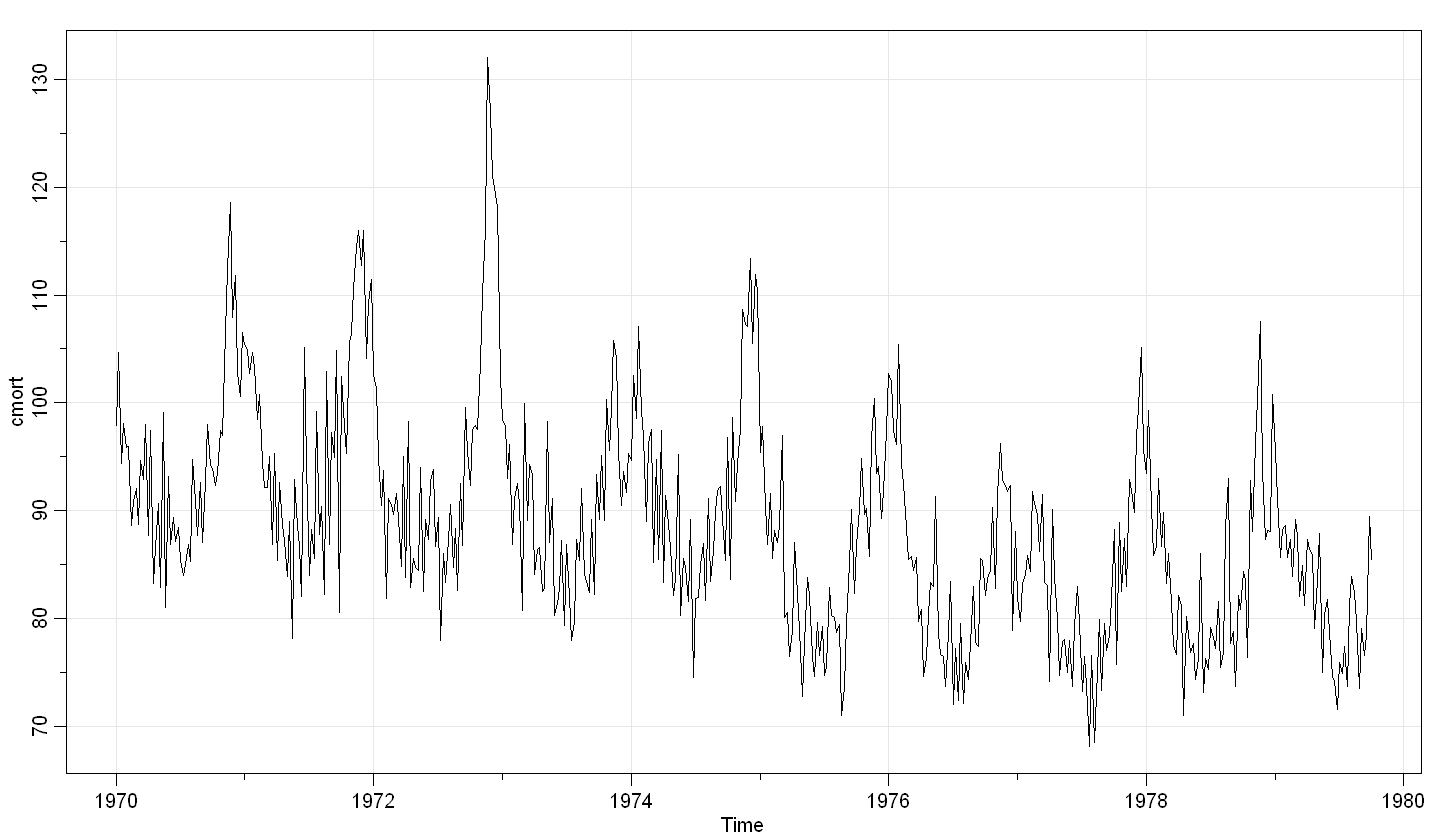

In [8]:
tsplot(cmort)

[1] 508

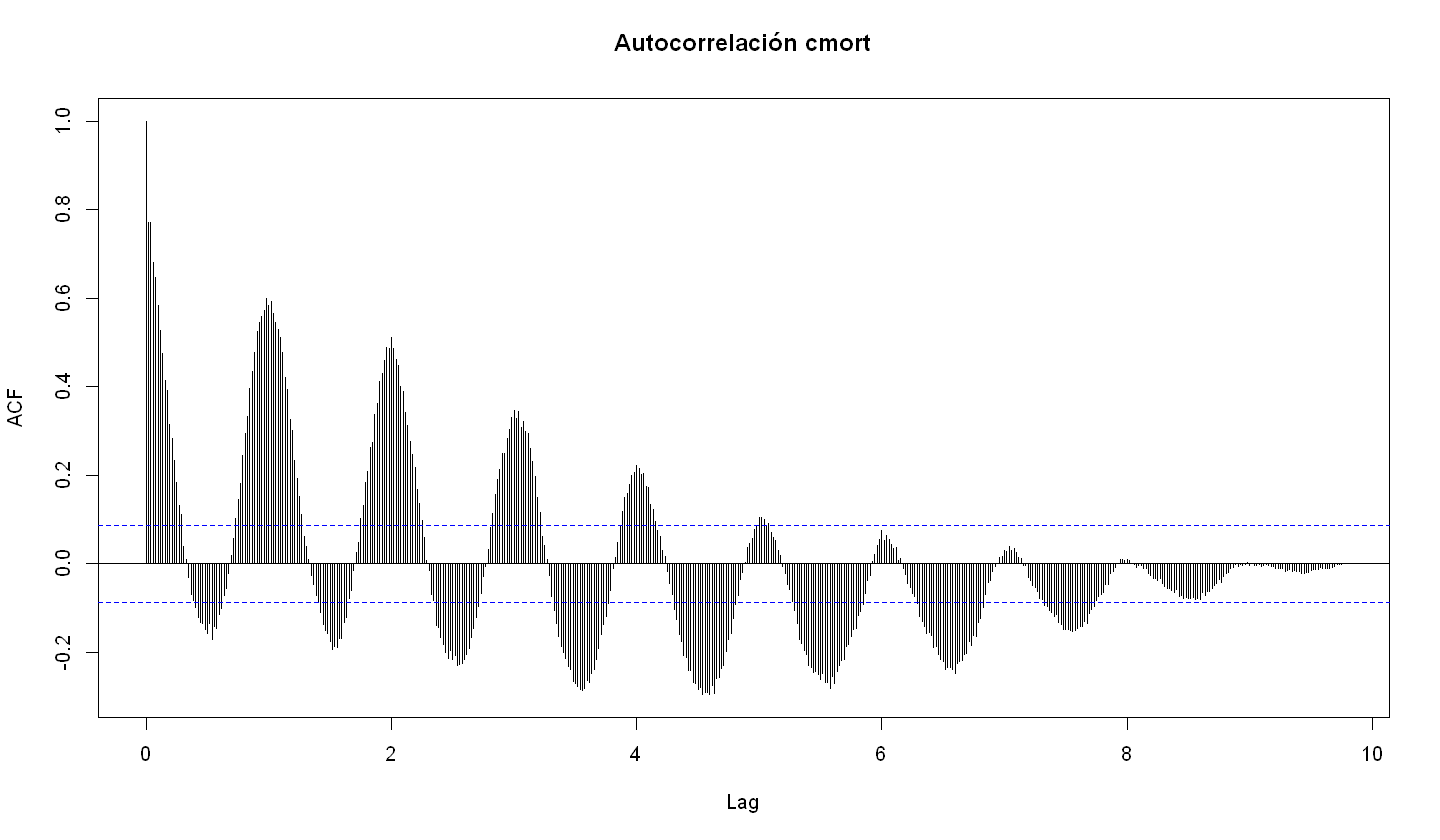

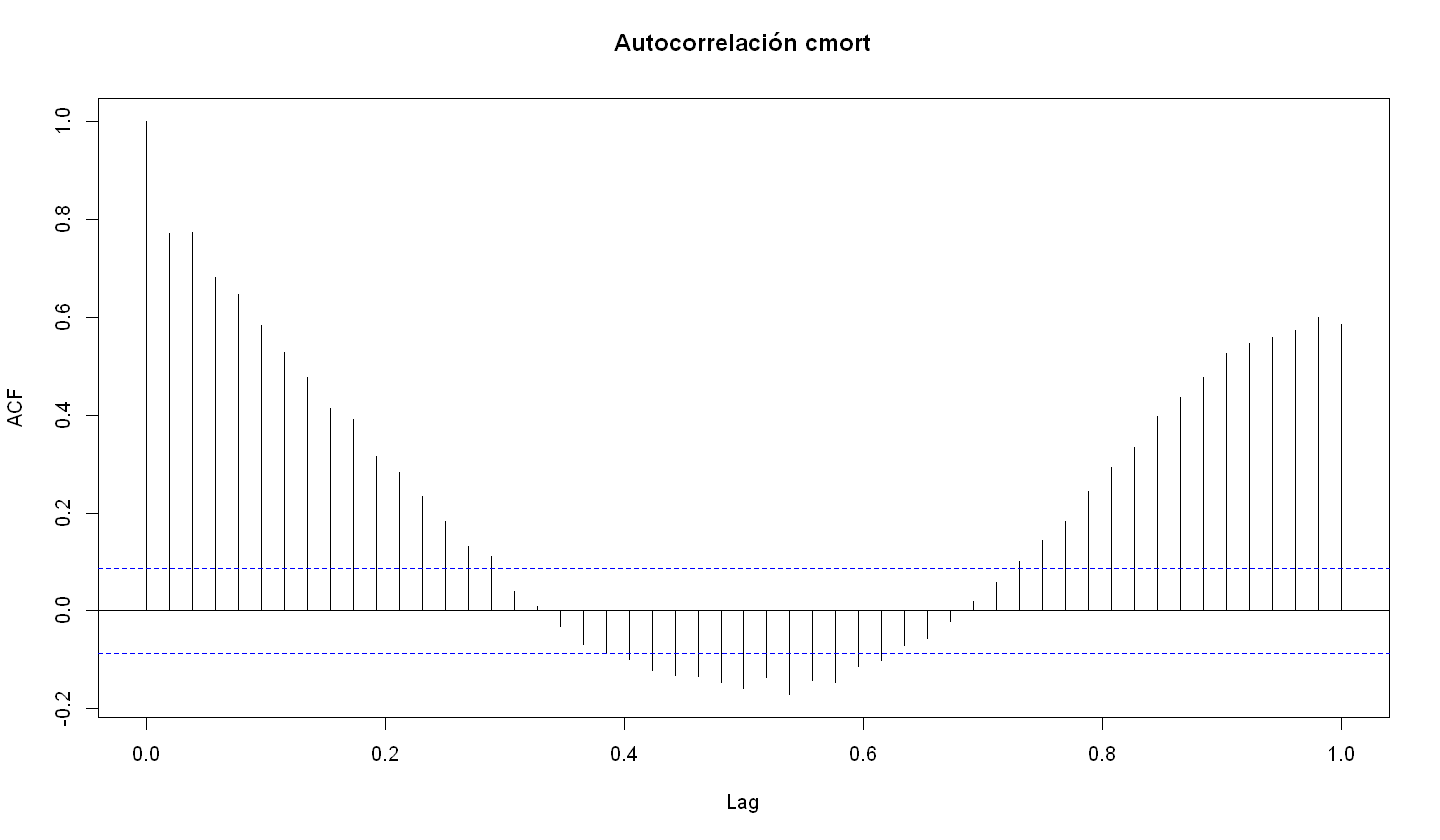

In [9]:
length(cmort)
acf(cmort, main = "Autocorrelación cmort", 600)
acf(cmort, main = "Autocorrelación cmort",52)

$$Observación:$$
Se observa un periodo que se repite con frecuencia = 50. Adémas se observa un decrecimiento del valor a lo largo del tiempo.  

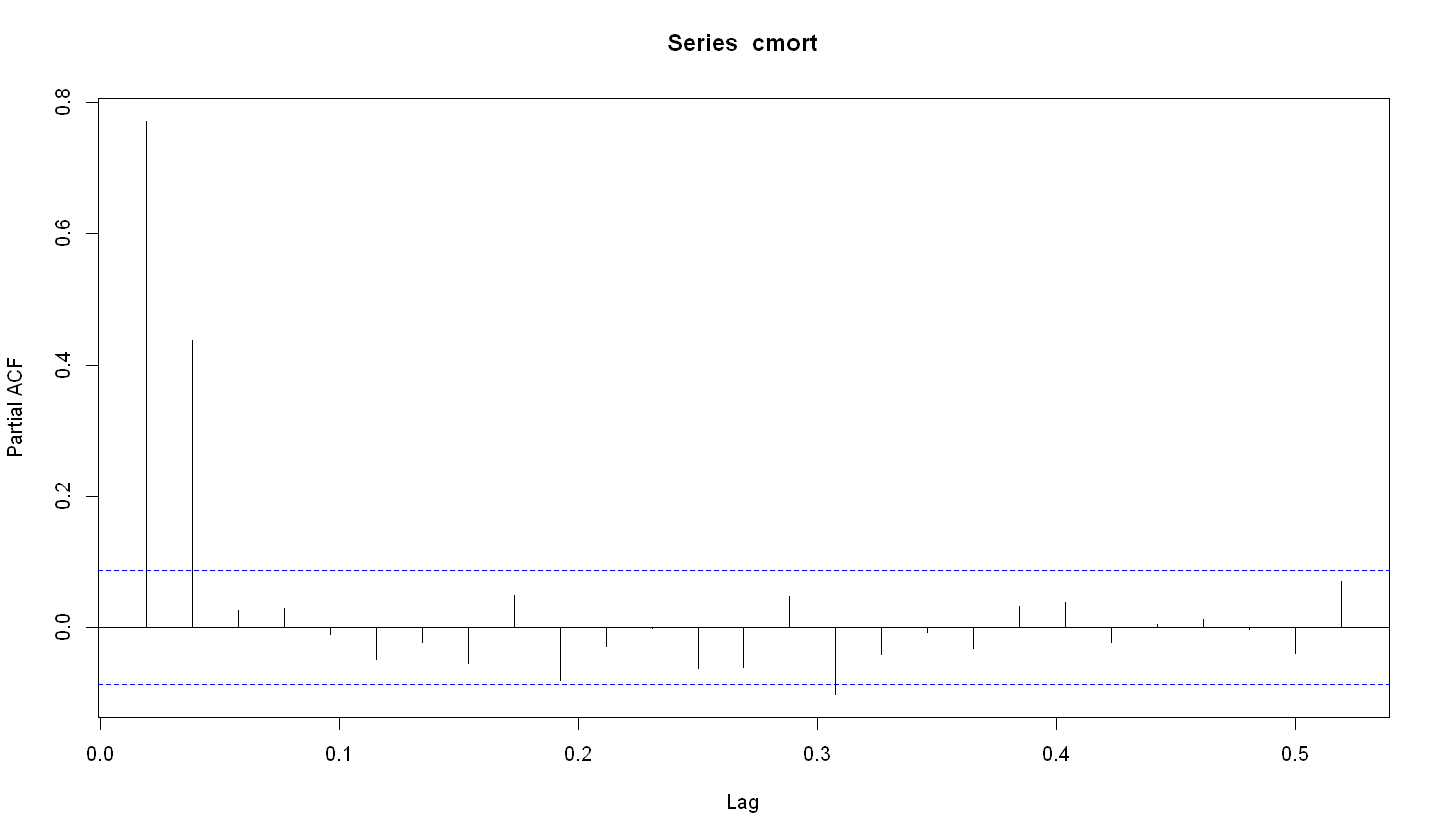

In [10]:
pacf(cmort)

$$Observación:$$
A partir de la funcion de autocorrelación parial, podemos observar que la serie "cmort" tiene una autocorrelación con 2 tiempo anteriores.

In [19]:
#Estimo los coeficientes por regresión
xt = cmort
head(xt)
data = ts.intersect(xt, xt1=lag(xt,-1), xt2=lag(xt,-2))
head(data)

[1]  97.85 104.64  94.36  98.05  95.85  95.98

xt,xt1,xt2
94.36,104.64,97.85
98.05,94.36,104.64
95.85,98.05,94.36
95.98,95.85,98.05
88.63,95.98,95.85
90.85,88.63,95.98


In [20]:

fit_cmort <- lm(xt~xt1+xt2,data=data)
summary(fit_cmort)


Call:
lm(formula = xt ~ xt1 + xt2, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.8192  -4.0339  -0.2112   3.4219  22.1840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.45061    2.40080   4.769 2.42e-06 ***
xt1          0.42859    0.03991  10.738  < 2e-16 ***
xt2          0.44179    0.03988  11.078  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.702 on 503 degrees of freedom
Multiple R-squared:  0.6752,	Adjusted R-squared:  0.6739 
F-statistic: 522.8 on 2 and 503 DF,  p-value: < 2.2e-16


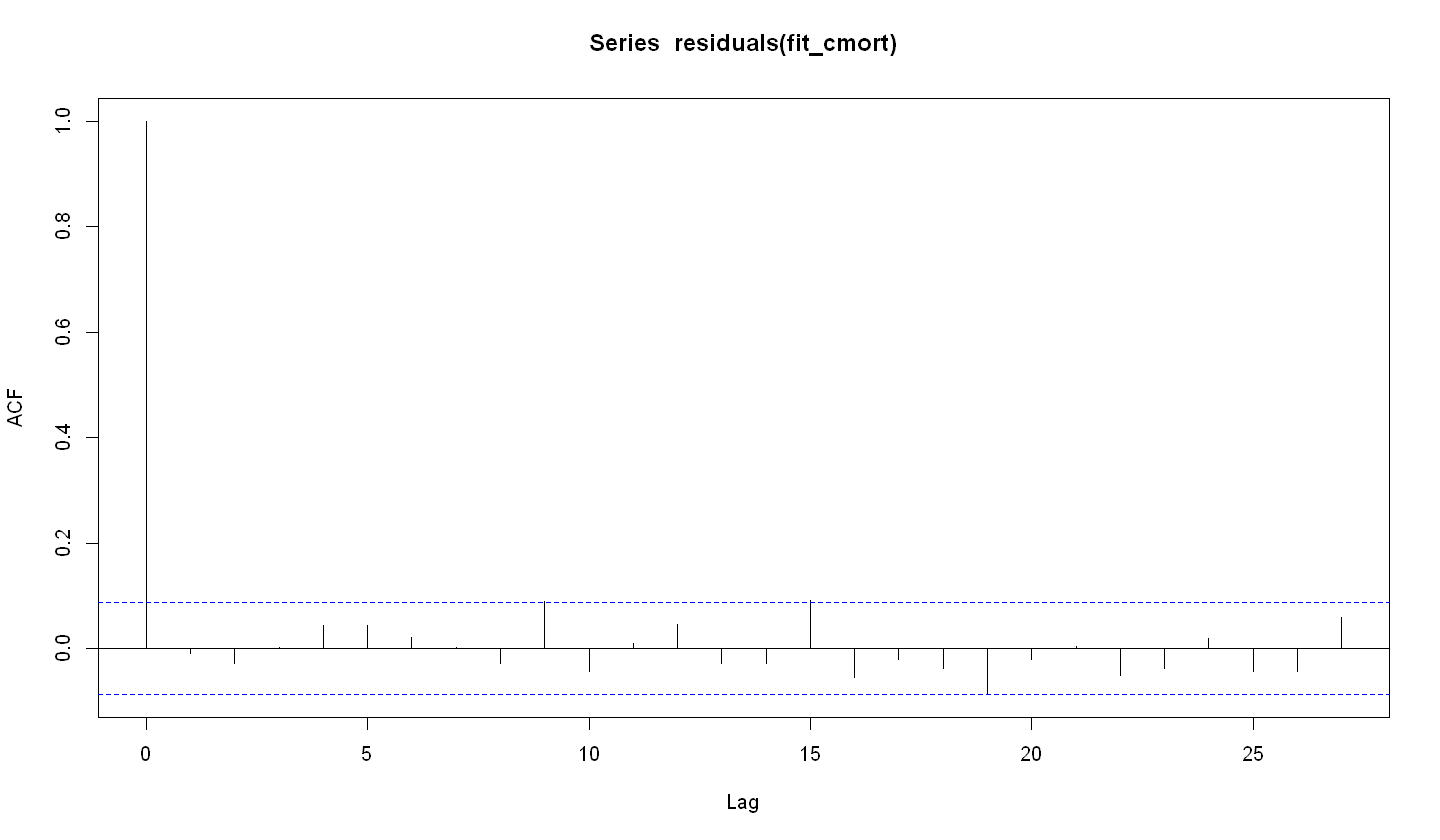

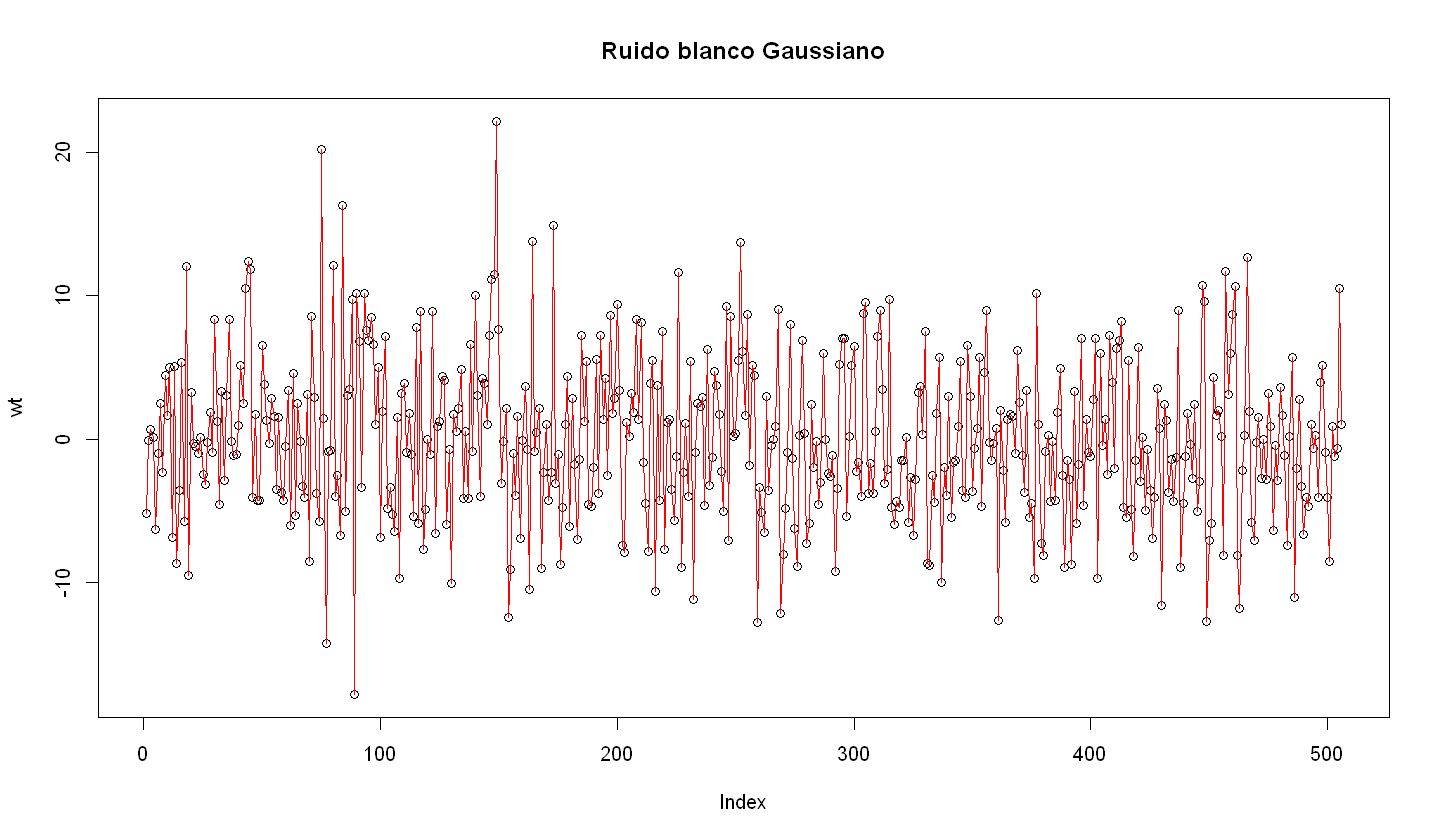

In [21]:
acf(residuals(fit_cmort))
wt= residuals(fit_cmort)
plot(wt, main = "Ruido blanco Gaussiano")
lines(residuals(fit_cmort), col =2)

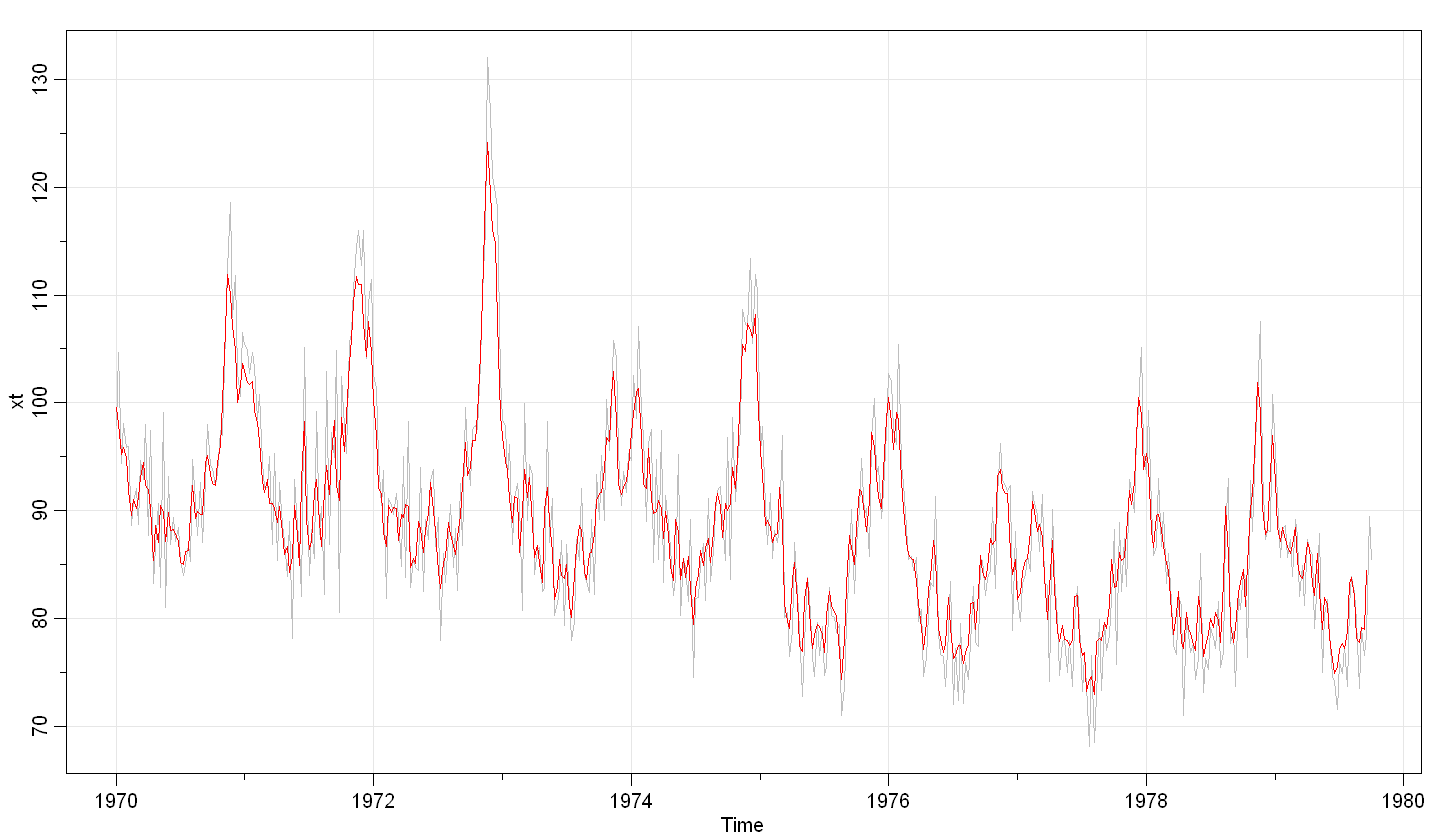

In [22]:
adj = ts(fitted(fit_cmort), start = 1970, frequency = 52)
tsplot(xt, col = 8)
lines(adj, col=2)

In [23]:
phi_intercept <- fit_cmort$coef["(Intercept)"]
phi1 <- fit_cmort$coef["xt1"]
phi2 <- fit_cmort$coef["xt2"]

phi_intercept
phi1
phi2

(Intercept) 
   11.45061

xt1 
0.4285906

xt2 
0.4417874

 [1] 87.59986 86.76349 87.33714 87.21350 87.41394 87.44522 87.54719 87.60471
 [9] 87.67440 87.72969 87.78417 87.83195 87.87649 87.91669 87.95360 87.98718
[17] 88.01788 88.04587 88.07143 88.09475 88.11604 88.13546 88.15319 88.16937
[25] 88.18414 88.19762 88.20992 88.22114 88.23139 88.24074 88.24927 88.25706
[33] 88.26417 88.27066 88.27658 88.28198 88.28692 88.29142 88.29552 88.29927
[41] 88.30270 88.30582 88.30867 88.31127 88.31364 88.31581 88.31779 88.31959
[49] 88.32124 88.32274 88.32411 88.32537


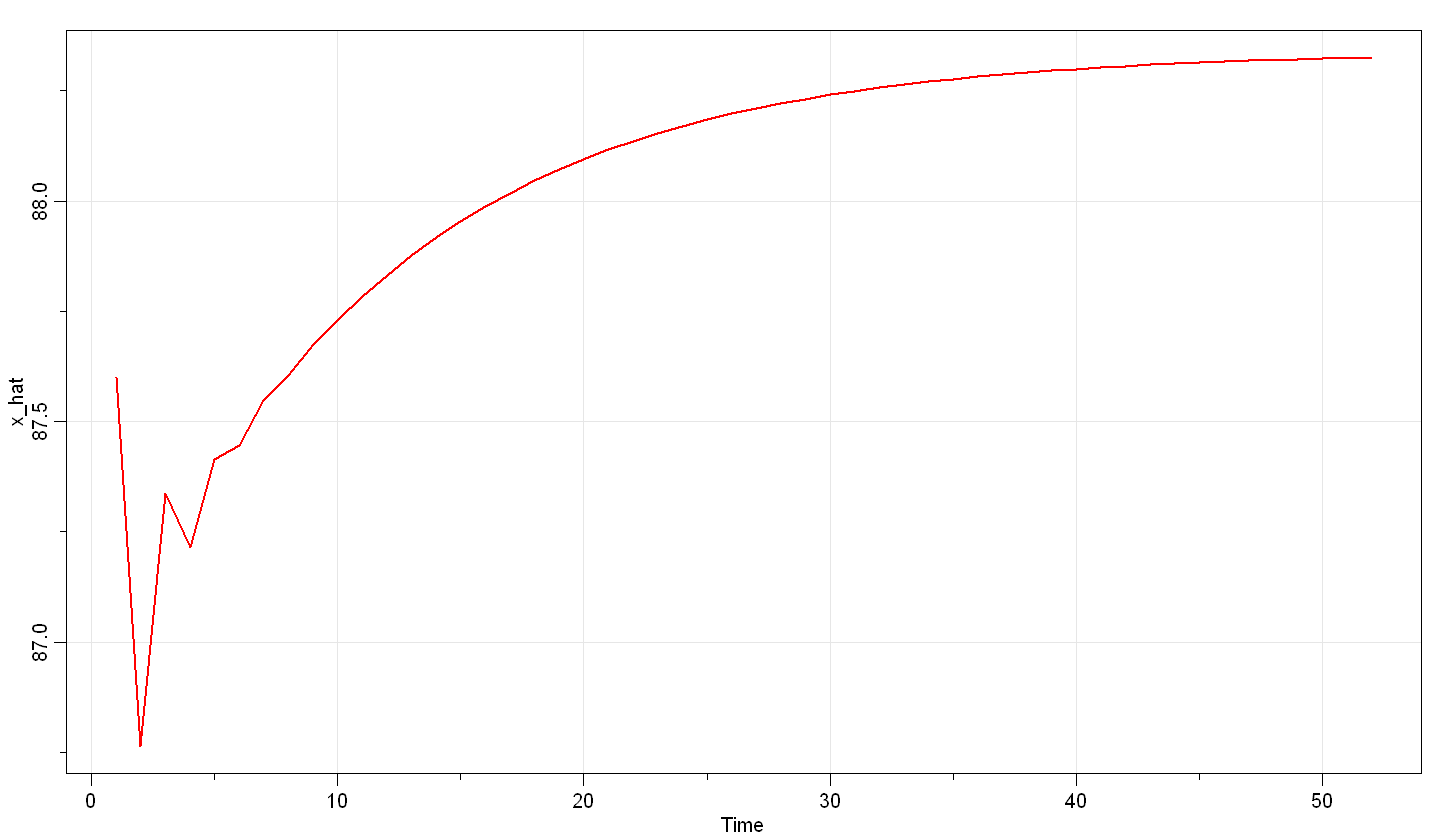

In [24]:
x_hat <- vector()
phi = phi_intercept
x_hat[1] =  phi + phi1 * xt[508] + phi2*xt[507]
x_hat[2] = phi + phi1 * x_hat[1] + phi2*xt[508]

for (i in 3:52)
{
    x_hat[i] = phi +  phi1 * x_hat[i-1] + phi2*x_hat[i-2]
}

tsplot(x_hat, col="red", lwd=2)

print(x_hat)

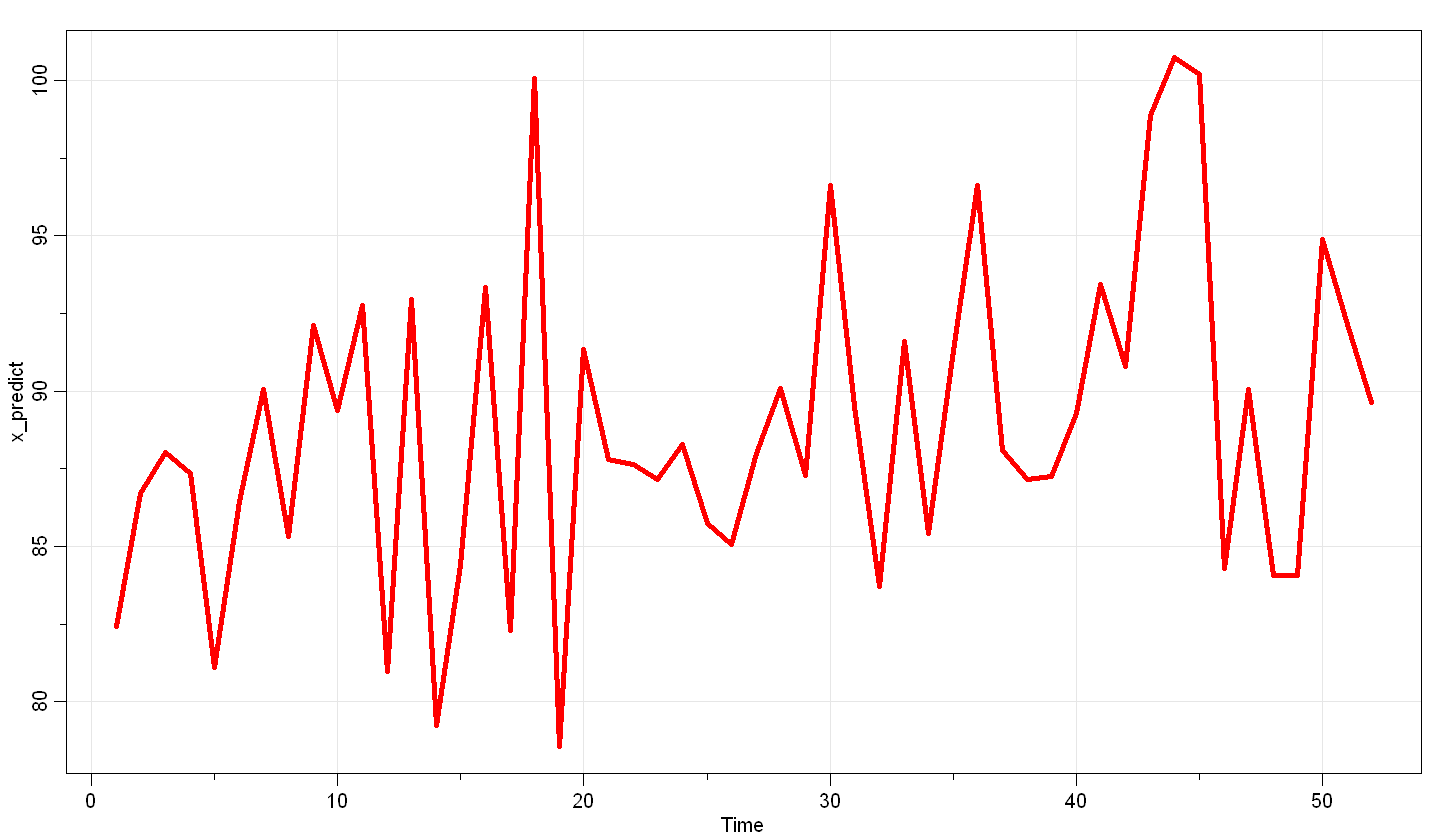

In [25]:
x_predict = x_hat + wt[0:52]
tsplot(x_predict, col = 2 , lwd = 4)

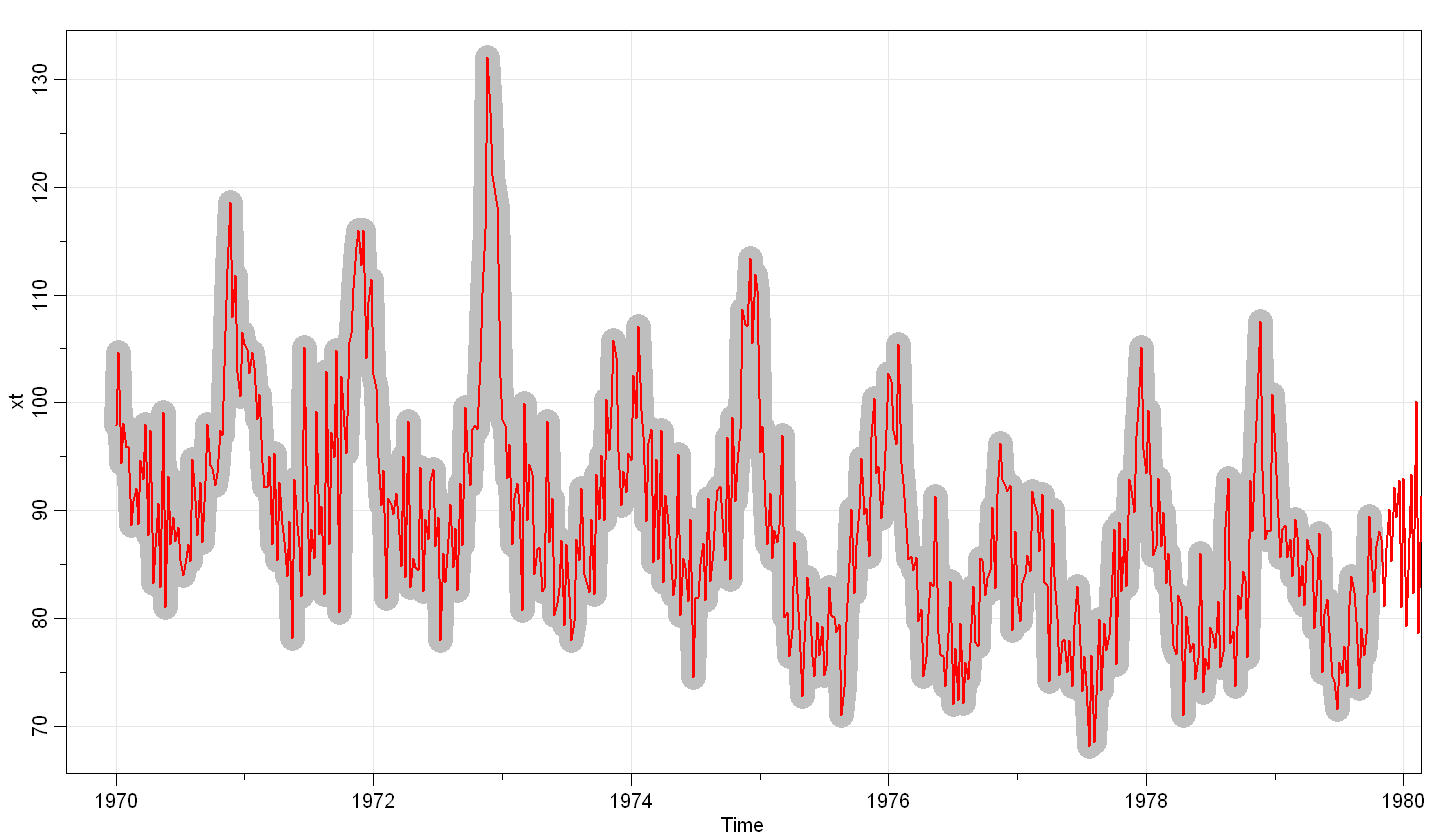

In [26]:
new_cmort= c(xt, x_predict)
predict = ts((new_cmort), start = 1970, frequency = 52)
tsplot(xt, col = 8, lwd = 20)
lines(predict, col = 2, lwd = 2)


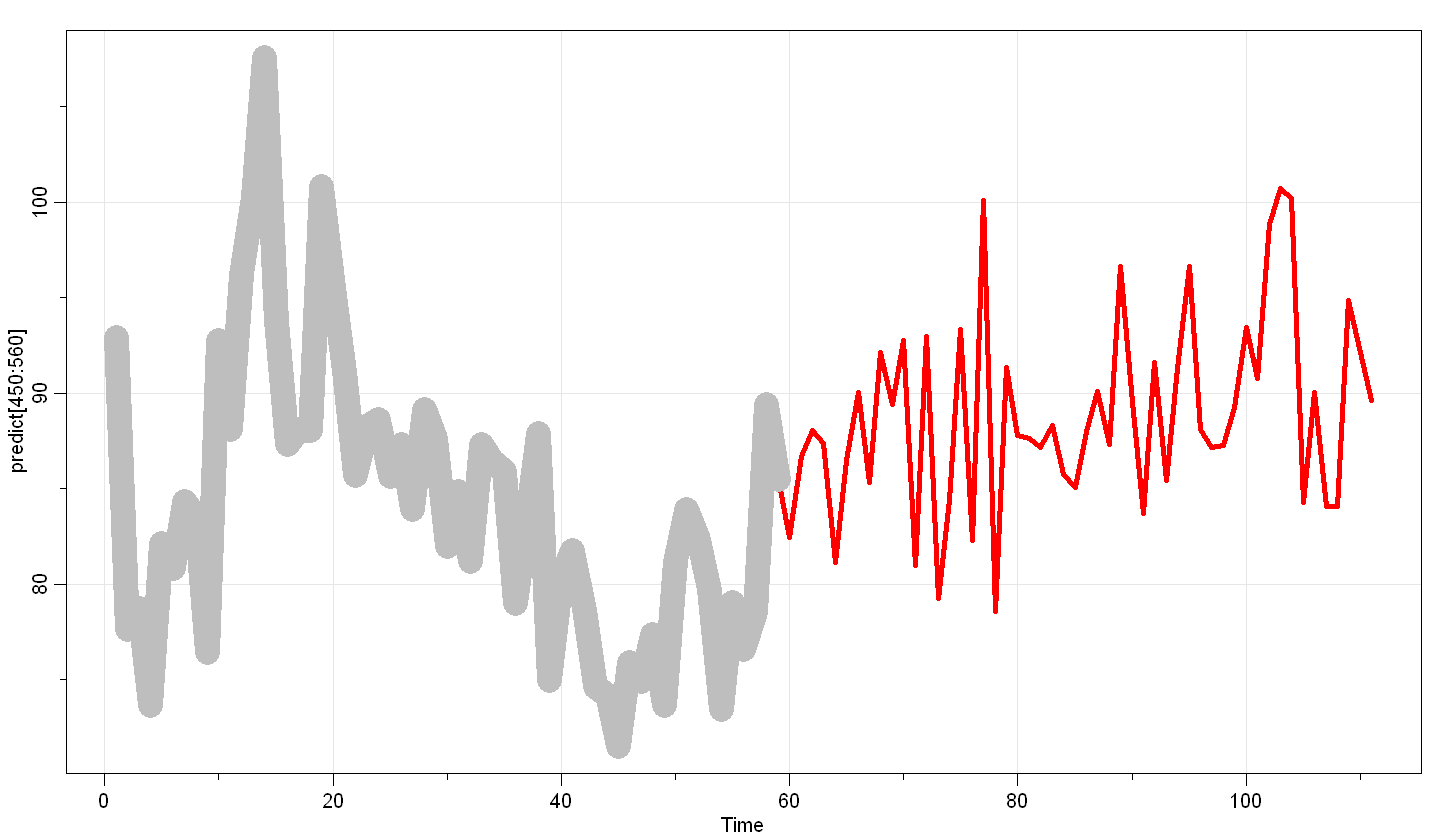

In [27]:
tsplot(predict[450:560], col = 2 , lwd = 4)
lines(xt[450:508], col = 8, lwd = 20)


## Ejercicio 2 (diferencias para estacionariedad)

Considere la serie `gnp` de producto bruto interno de EEUU incluida en la biblioteca `astsa`. La serie contiene el PBI de EEUU trimestral de 1947 a 2002 ($n=223$), en billones de dólares de 1996, ajustado estacionalmente.

 1. Analice el comportamiento de la serie. ¿Es estacionaria?
 2. Considere la transformación log(gnp). Proponga un ajuste lineal para la tendencia.
 3. Ajuste un modelo autorregresivo a los residuos de la serie. Analice el error cometido.
 4. Se propone ahora como forma de estacionarizar la serie tomar las diferencias de valores consecutivos usando el comando  `diff`. Notar que esta transformación deja el crecimiento relativo de la serie.
 5. Ajuste nuevamente un modelo autorregresivo a los residuos (no olvide la media) y analice el error.
 6. Repita lo anterior usando las primeras 200 observaciones, y propóngase estimar las restantes 23. ¿Cuál de los dos modelos predice mejor?

In [28]:
data = gnp
length(data)
head(data)

[1] 223

[1] 1488.9 1496.9 1500.5 1524.3 1546.6 1571.1

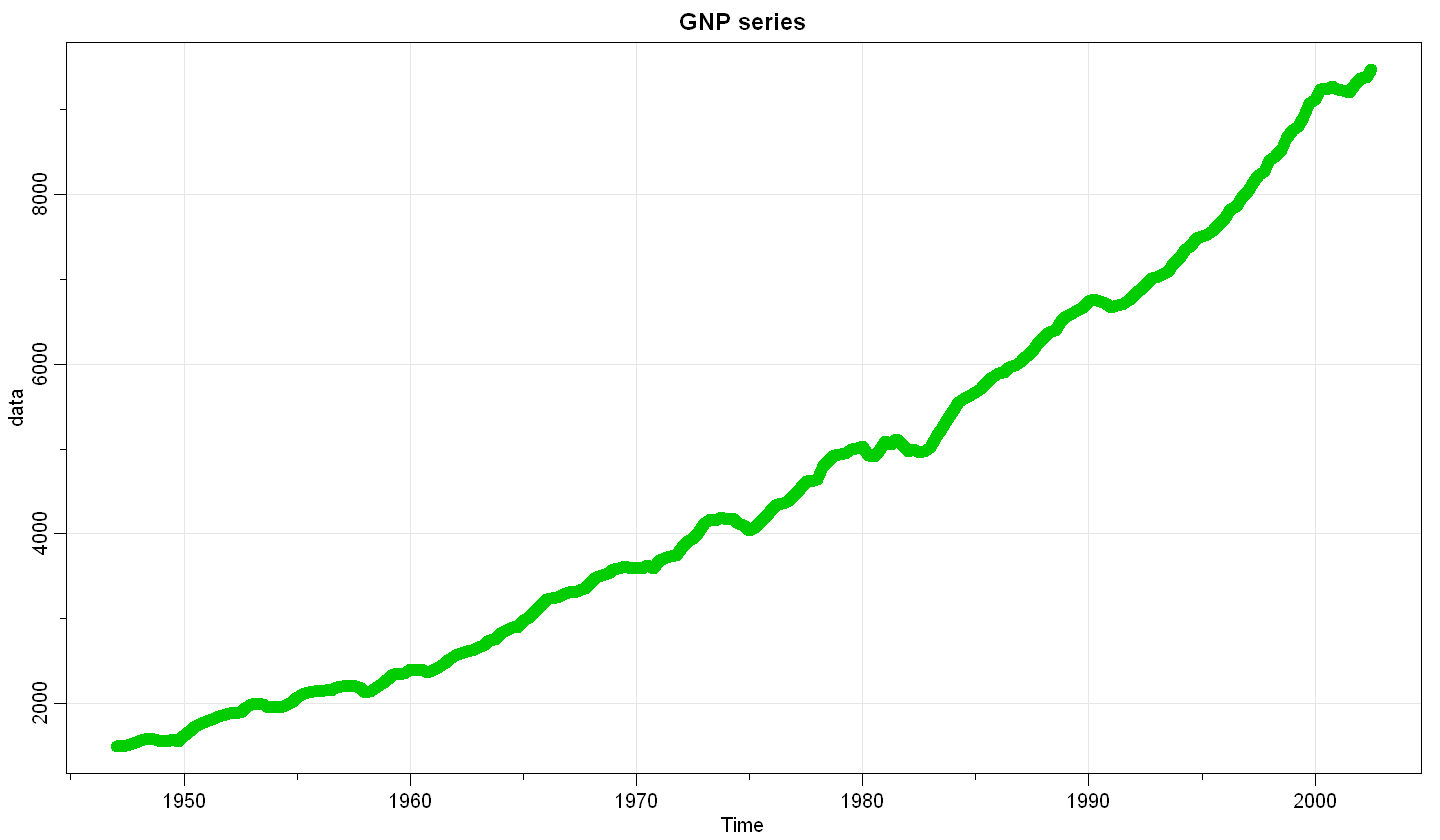

In [29]:
tsplot(data, col = 3, lwd = 10 , main = "GNP series")

$Observación:$
Se puede observar que la serie no es estacionaria, tiene una tendencia.

In [30]:
t_data = log(data)

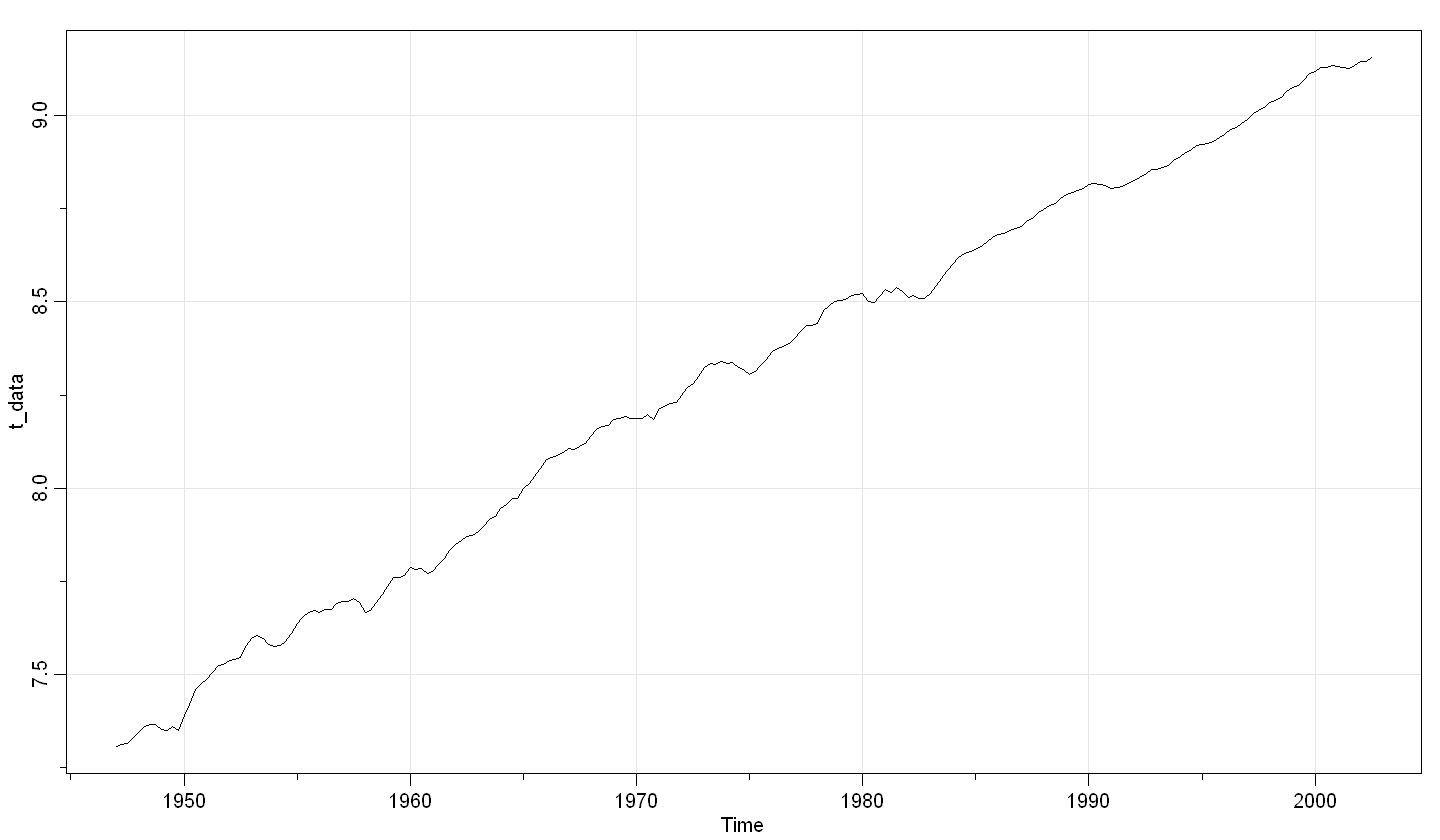

In [31]:
tsplot(t_data)

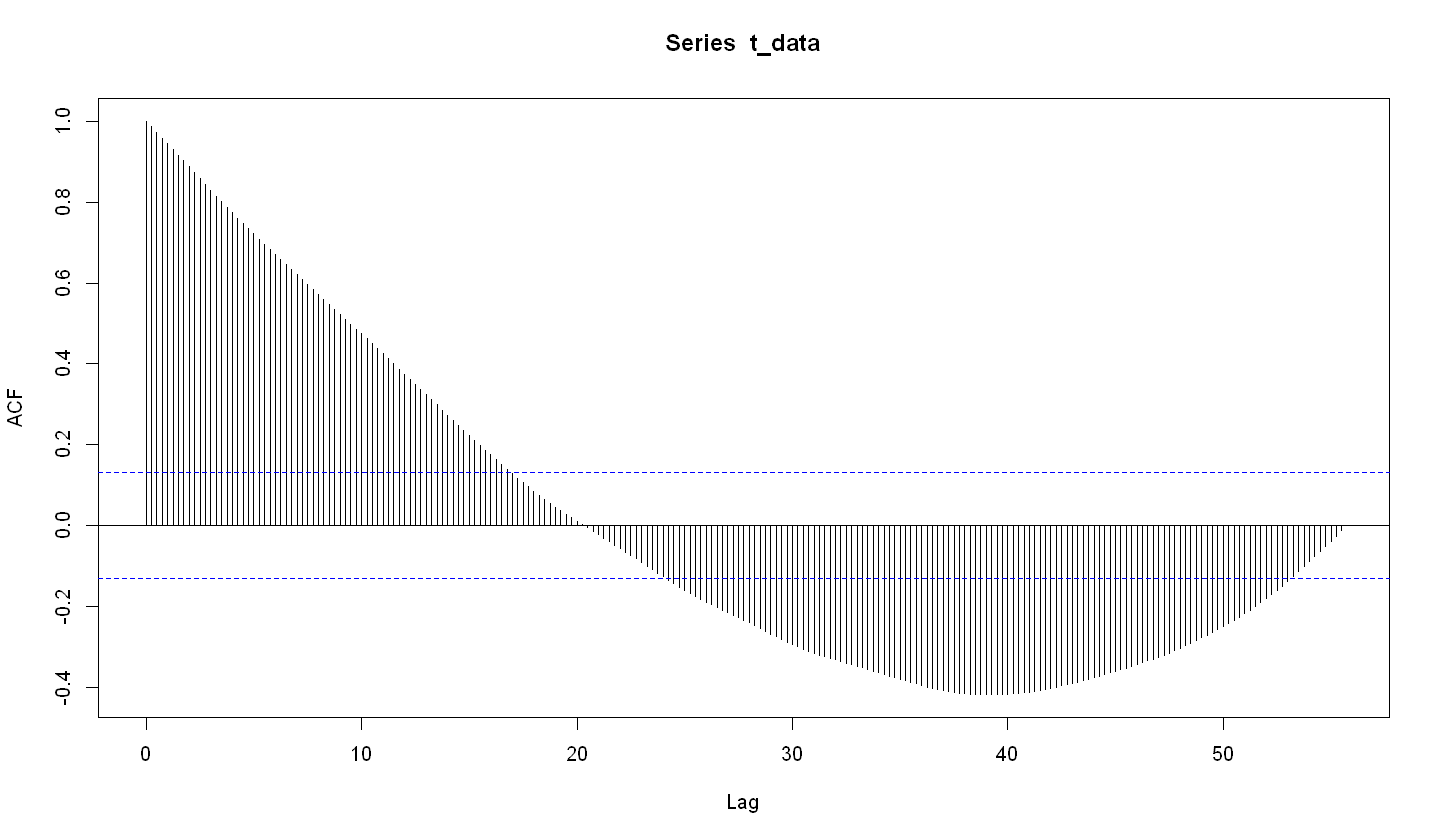

In [32]:
acf(t_data, 300)

In [33]:
fit_t = lm(t_data ~ time(t_data))
summary(fit_t)


Call:
lm(formula = t_data ~ time(t_data))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.113325 -0.034293 -0.002662  0.028396  0.093294 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.726e+01  3.609e-01  -158.7   <2e-16 ***
time(t_data)  3.320e-02  1.828e-04   181.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04392 on 221 degrees of freedom
Multiple R-squared:  0.9933,	Adjusted R-squared:  0.9933 
F-statistic: 3.299e+04 on 1 and 221 DF,  p-value: < 2.2e-16


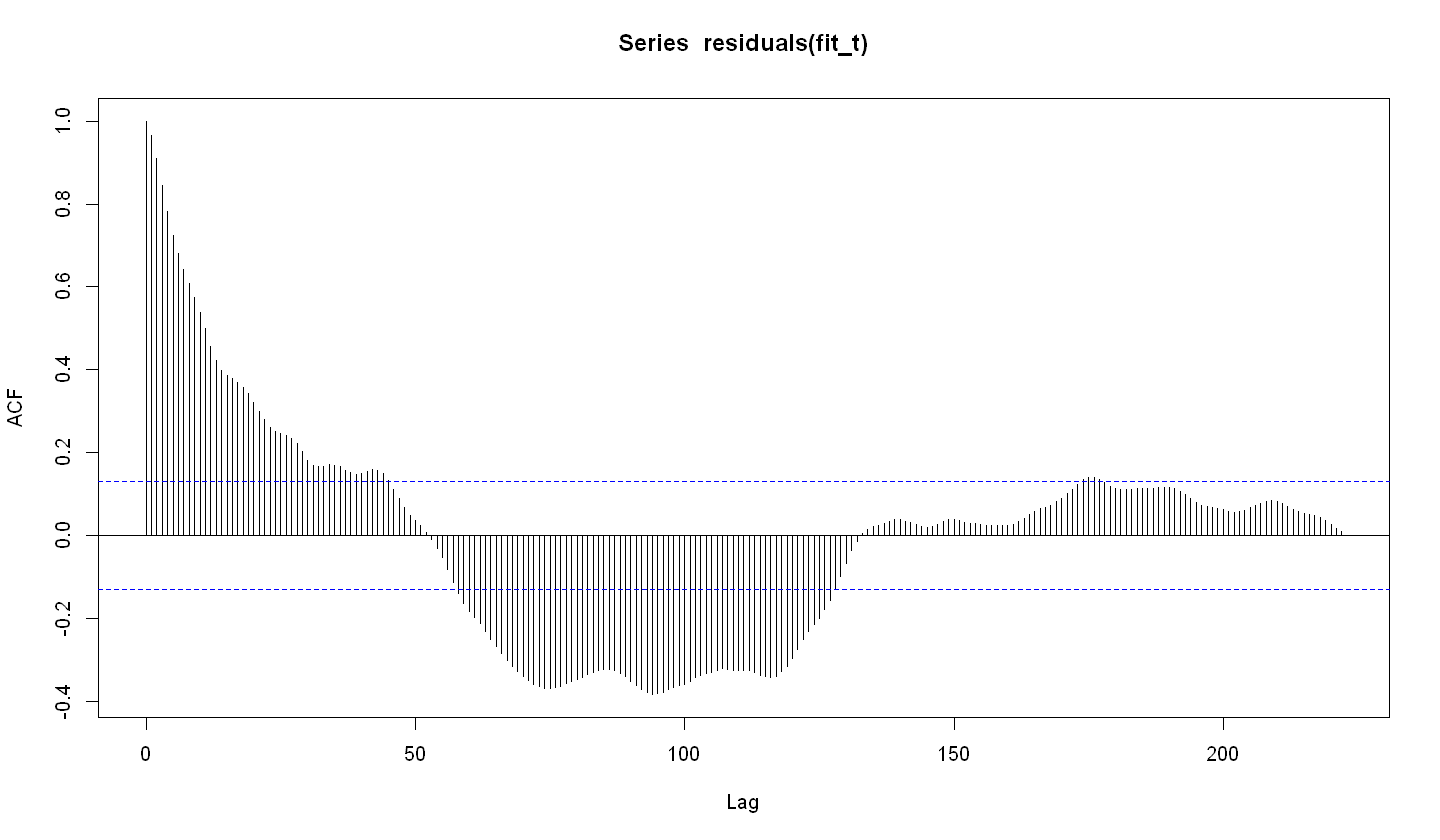

In [34]:
acf(residuals(fit_t), 300)

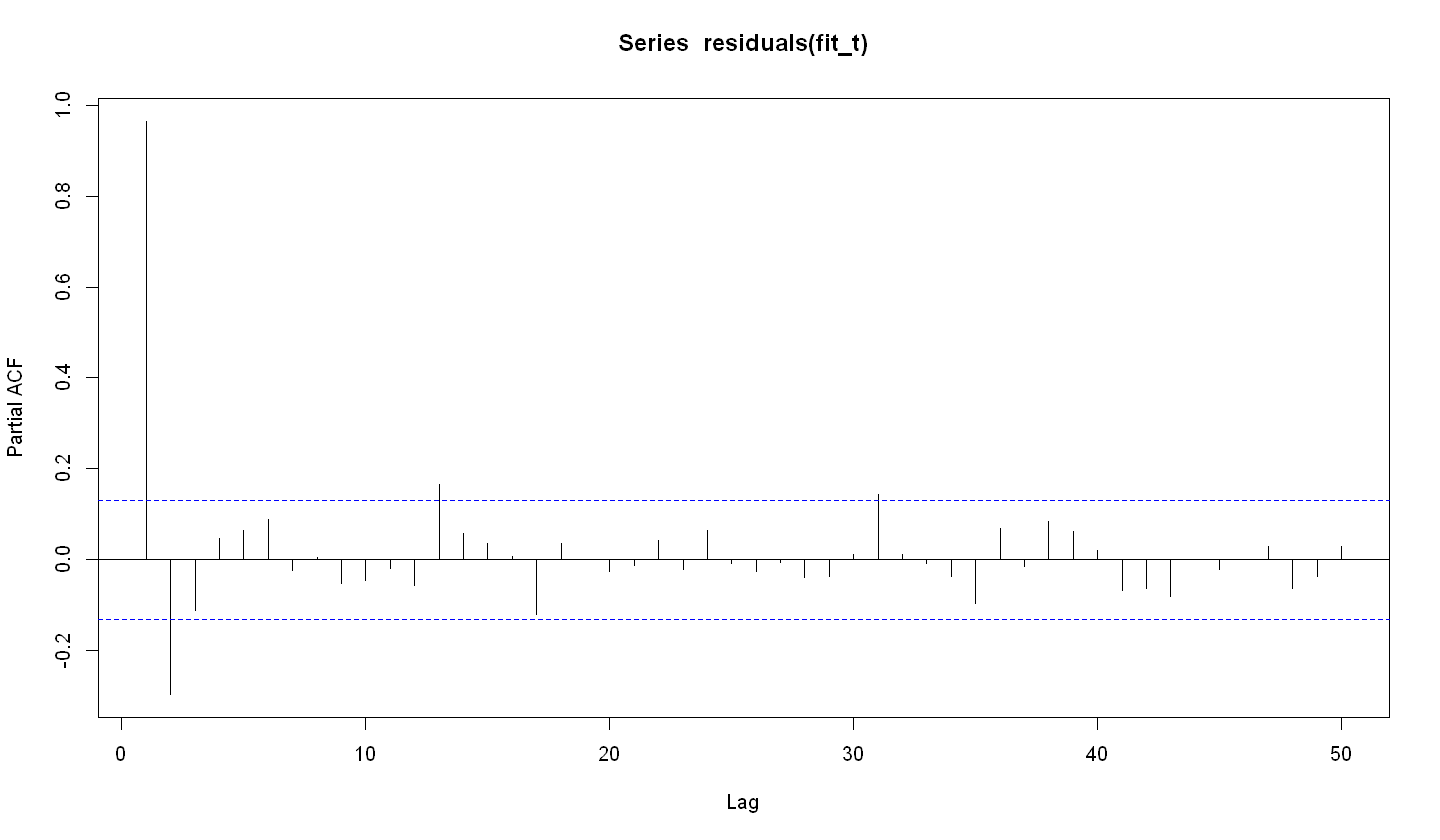

In [35]:
pacf(residuals(fit_t), 50)

In [36]:
AIC(fit_t)
BIC(fit_t)

[1] -757.0477

[1] -746.8262

In [37]:
y = residuals(fit_t)

fit_1 = arima(y, c(2,0,0), include.mean = FALSE)

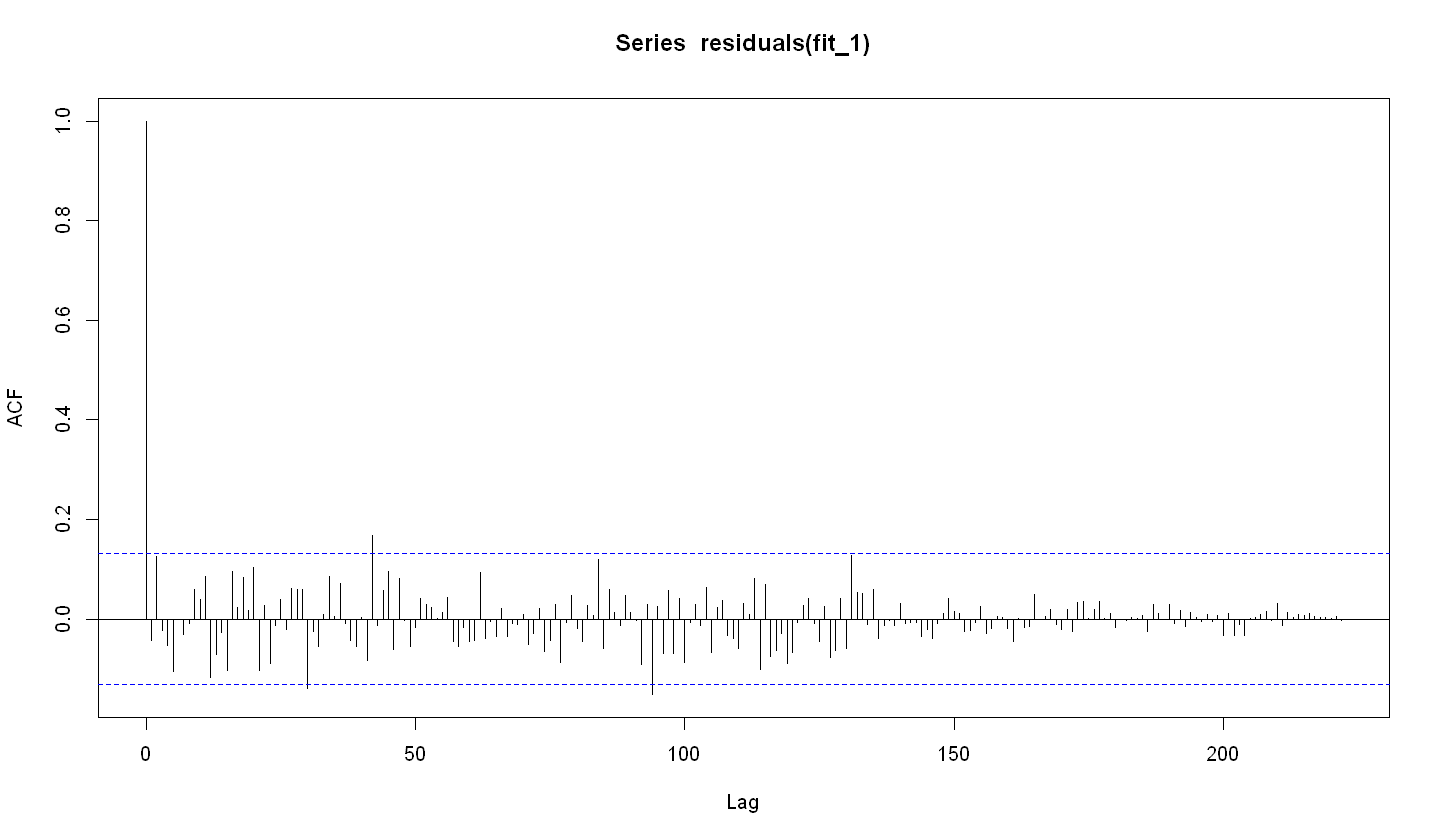

In [39]:
acf(residuals(fit_1), 300)

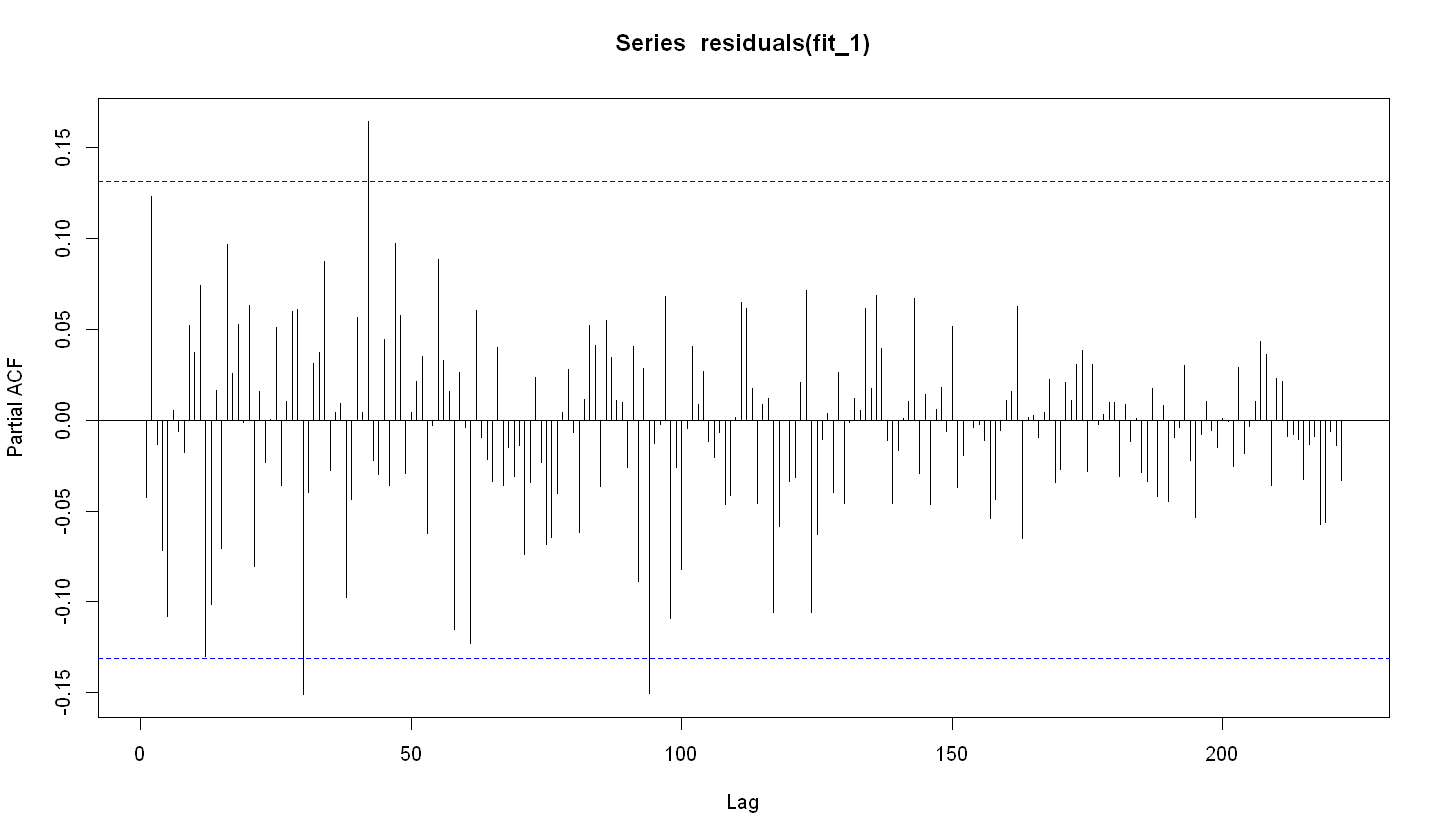

In [40]:
pacf(residuals(fit_1), 300)

$Observación:$ Despues de hacer el ajuste con un modelo autorregresivo de orden 2, se puede decir que extrajimos toda la información y los residuos son ruido gaussiano.

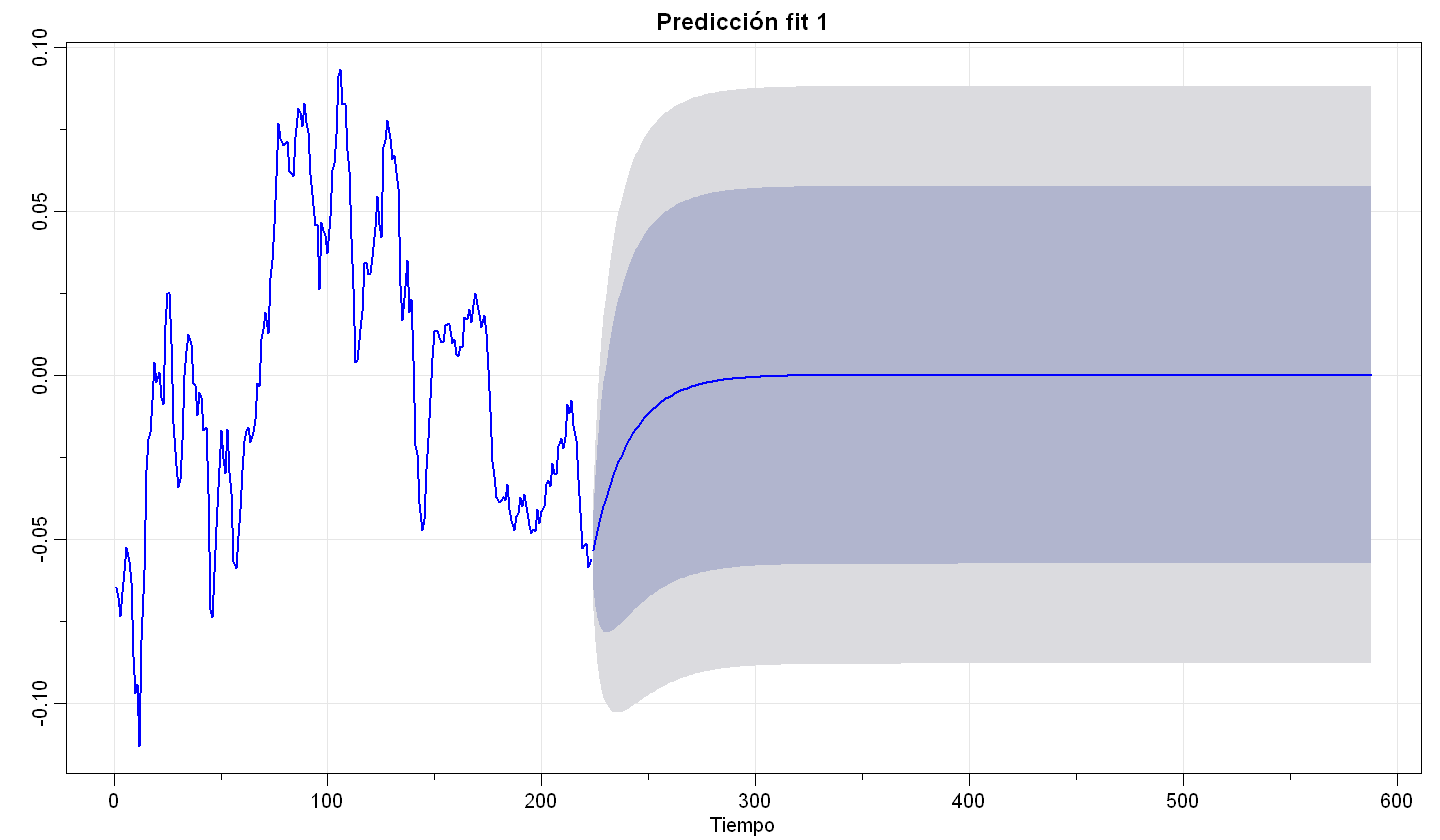

In [49]:
pred1= forecast(fit_1,h=365) 
tsplot(pred1,col="blue", lwd=2, main = "Predicción fit 1" ,xlab = "Tiempo", ylab = "")

$observaciòn:$ Luego de realizar la predicciòn se observa que las predicciones generadas por lags anteriores tienden a la Media. 